In [1]:
mashr_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/mashr/MASHR_july_2020/NeuroSeq/"

In [2]:
list.files(mashr_dir)

[1] "MASHR_local_false_sign_rate_NeuroSeq.txt"       
[2] "MASHR_posterior_mean_NeuroSeq.txt"              
[3] "MASHR_posterior_standard_deviation_NeuroSeq.txt"

In [3]:
sign_res = paste0(mashr_dir,"MASHR_local_false_sign_rate_NeuroSeq.txt")
mean_beta = paste0(mashr_dir,"MASHR_posterior_mean_NeuroSeq.txt")
std_beta = paste0(mashr_dir,"MASHR_posterior_standard_deviation_NeuroSeq.txt")

In [4]:
library(reshape2)
library(ggplot2)
##Functions
reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd,method="complete")
  cormat <-cormat[hc$order, hc$order]
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [5]:
get_lower_tri <- function(cormat){
  cormat[upper.tri(cormat)]<- NA
  return(cormat)
}

In [6]:
#V6 sc included
lsfrMat = read.delim(sign_res,as.is=T, row.names=1)
posteriorMean = read.delim(mean_beta,as.is=T, row.names=1)

In [7]:
nrow(lsfrMat)

[1] 8738

In [8]:
head(lsfrMat)

,iPSC.pool1_13_noddd_D11.FPP,iPSC.pool1_13_noddd_D11.NB,iPSC.pool1_13_noddd_D11.P_FPP,iPSC.pool1_13_noddd_D30.Astro,iPSC.pool1_13_noddd_D30.DA,iPSC.pool1_13_noddd_D30.Epen1,iPSC.pool1_13_noddd_D30.Sert,iPSC.qtl_results_NONE_Astro_all,iPSC.qtl_results_NONE_DA_all,iPSC.qtl_results_NONE_Epen1_all,iPSC.qtl_results_NONE_Sert_all,iPSC.qtl_results_ROT_Astro_all,iPSC.qtl_results_ROT_DA_all,iPSC.qtl_results_ROT_Epen1_all,iPSC.qtl_results_ROT_Sert_all
1_10003457_G_C-ENSG00000162441,0.6518176674,0.54805616,0.663447515,0.65126701,0.539537970,0.578982395,0.66227116,0.5722208,0.551409306,0.604068333,0.53196762,0.133122134,0.52252523,0.681161219,0.492023370
1_10003457_G_C-ENSG00000173614,0.0009527946,0.03287377,0.005910685,0.00149585,0.008994919,0.007580233,0.00262363,0.1744287,0.006933351,0.005946988,0.00460887,0.008558593,0.01248641,0.002525919,0.001119958
1_100099170_A_C-ENSG00000117620,0.2732129538,0.05577454,0.237281680,0.42736576,0.073051156,0.511355259,0.43700365,0.1772552,0.203275209,0.235407945,0.27120287,0.427784527,0.32059068,0.275055934,0.399258130
1_100202109_A_G-ENSG00000156876,0.4735643813,0.48720836,0.529777207,0.58482723,0.498738236,0.610094166,0.52366877,0.5411988,0.313329188,0.561198213,0.47113462,0.531277729,0.51442523,0.510630617,0.440792385
1_100249550_C_A-ENSG00000122435,0.4881985463,0.46239066,0.619217904,0.58786938,0.621216360,0.525050624,0.53904192,0.4786018,0.521588102,0.427116659,0.57342976,0.470018782,0.51966277,0.448704090,0.596536941
1_100435079_T_C-ENSG00000162688,0.5190925772,0.64395938,0.634266550,0.56907083,0.588994630,0.314834994,0.55642925,0.6092806,0.619060313,0.526102164,0.61146855,0.627499267,0.51588234,0.612339478,0.578708181


In [9]:
head(rownames(lsfrMat))
genes = gsub(".*-","",rownames(lsfrMat))
head(genes)

[1] "1_10003457_G_C-ENSG00000162441"  "1_10003457_G_C-ENSG00000173614" 
[3] "1_100099170_A_C-ENSG00000117620" "1_100202109_A_G-ENSG00000156876"
[5] "1_100249550_C_A-ENSG00000122435" "1_100435079_T_C-ENSG00000162688"

[1] "ENSG00000162441" "ENSG00000173614" "ENSG00000117620" "ENSG00000156876"
[5] "ENSG00000122435" "ENSG00000162688"

In [10]:
colnames(lsfrMat)

[1] "iPSC.pool1_13_noddd_D11.FPP"     "iPSC.pool1_13_noddd_D11.NB"     
 [3] "iPSC.pool1_13_noddd_D11.P_FPP"   "iPSC.pool1_13_noddd_D30.Astro"  
 [5] "iPSC.pool1_13_noddd_D30.DA"      "iPSC.pool1_13_noddd_D30.Epen1"  
 [7] "iPSC.pool1_13_noddd_D30.Sert"    "iPSC.qtl_results_NONE_Astro_all"
 [9] "iPSC.qtl_results_NONE_DA_all"    "iPSC.qtl_results_NONE_Epen1_all"
[11] "iPSC.qtl_results_NONE_Sert_all"  "iPSC.qtl_results_ROT_Astro_all" 
[13] "iPSC.qtl_results_ROT_DA_all"     "iPSC.qtl_results_ROT_Epen1_all" 
[15] "iPSC.qtl_results_ROT_Sert_all"

In [11]:
# sampleSizeTissues = read.delim(tissue_samplesize,as.is=T, sep=",")
# sampleSizeTissues
# sampleSizeTissues = sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]
# head(sampleSizeTissues)
# all(sampleSizeTissues$tissue == colnames(lsfrMat))
# sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]

In [87]:
ratio = 2
lsfrThreshold = 0.05
any = T
both = F
smallest = F

In [88]:
sameSignMagnitude = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))
sameSign = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))
total = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))

In [89]:
cols = grep("_D",colnames(lsfrMat))
length(colnames(lsfrMat)[cols])

[1] 9

In [90]:
nrow(lsfrMat)

[1] 8738

In [91]:
toConsider = which(lsfrMat[,cols[1]] < lsfrThreshold )
for (i in 2:length(cols)){
    toConsider = unique(c(toConsider,which(lsfrMat[,cols[i]] < lsfrThreshold)))
}
length(toConsider)

[1] 1730

In [92]:
for(colN in 1:ncol(lsfrMat)){
    for(colM in colN:ncol(lsfrMat)){
        total[colN,colM] = length(toConsider)
        total[colM,colN] = total[colN,colM]

        tmpInfo = posteriorMean[toConsider,colN]/posteriorMean[toConsider,colM]
        tmpInfo2 = tmpInfo[which(tmpInfo>0)]
        sameSign[colN,colM] = length(tmpInfo2)
        sameSign[colM,colN] = sameSign[colN,colM]

        tmpInfo2[which(tmpInfo2<1)] = 1/tmpInfo2[which(tmpInfo2<1)]
        sameSignMagnitude[colN,colM] = length(which(tmpInfo2<=ratio))
        sameSignMagnitude[colM,colN] = sameSignMagnitude[colN,colM]
    }
}

In [93]:
options(warn=2)
if(sum(any,both, smallest)==1){
  for(colN in 1:ncol(lsfrMat)){
    for(colM in colN:ncol(lsfrMat)){
      if(any){
        toConsider = unique(c(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold)))
      } else if(both) {
        toConsider = intersect(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold))
      } else if(smallest){
        if(sampleSizeTissues$n[colN] > sampleSizeTissues$n[colM]){
          toConsider = which(lsfrMat[,colM]<lsfrThreshold)
        } else {
          toConsider = which(lsfrMat[,colN]<lsfrThreshold)
        }
      }
      total[colN,colM] = length(toConsider)
      total[colM,colN] = total[colN,colM]
      
      tmpInfo = posteriorMean[toConsider,colN]/posteriorMean[toConsider,colM]
      tmpInfo2 = tmpInfo[which(tmpInfo>0)]
      sameSign[colN,colM] = length(tmpInfo2)
      sameSign[colM,colN] = sameSign[colN,colM]
      
      tmpInfo2[which(tmpInfo2<1)] = 1/tmpInfo2[which(tmpInfo2<1)]
      sameSignMagnitude[colN,colM] = length(which(tmpInfo2<=ratio))
      sameSignMagnitude[colM,colN] = sameSignMagnitude[colN,colM]
    }
  }
} else {
  print("Setting issue.")
}

In [94]:
# options(warn=1)

pairwiseSharingSign = sameSign/total
pairwiseSharing = sameSignMagnitude/total

colnames(pairwiseSharing) = colnames(lsfrMat)
rownames(pairwiseSharing) = colnames(lsfrMat)
colnames(pairwiseSharingSign) = colnames(lsfrMat)
rownames(pairwiseSharingSign) = colnames(lsfrMat)

##Sign only
upper_tri <- get_lower_tri(reorder_cormat(as.matrix(pairwiseSharingSign)))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
head(melted_cormat)

##Sign only
# upper_tri <- get_lower_tri(reorder_cormat(as.matrix(pairwiseSharing)))
# melted_cormat <- melt(upper_tri, na.rm = TRUE)
# head(melted_cormat)

X1,X2,value
iPSC.pool1_13_noddd_D11.NB,iPSC.pool1_13_noddd_D11.NB,1.0000000
iPSC.pool1_13_noddd_D11.FPP,iPSC.pool1_13_noddd_D11.NB,0.9663810
iPSC.pool1_13_noddd_D11.P_FPP,iPSC.pool1_13_noddd_D11.NB,0.9537954
iPSC.qtl_results_NONE_Astro_all,iPSC.pool1_13_noddd_D11.NB,0.9294781
iPSC.qtl_results_ROT_Astro_all,iPSC.pool1_13_noddd_D11.NB,0.9433692
iPSC.pool1_13_noddd_D30.DA,iPSC.pool1_13_noddd_D11.NB,0.9415671


In [95]:
# install.packages("ggthemes")

In [96]:
library(ggthemes)

In [97]:
col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [98]:
colnames(pairwiseSharingSign)

[1] "iPSC.pool1_13_noddd_D11.FPP"     "iPSC.pool1_13_noddd_D11.NB"     
 [3] "iPSC.pool1_13_noddd_D11.P_FPP"   "iPSC.pool1_13_noddd_D30.Astro"  
 [5] "iPSC.pool1_13_noddd_D30.DA"      "iPSC.pool1_13_noddd_D30.Epen1"  
 [7] "iPSC.pool1_13_noddd_D30.Sert"    "iPSC.qtl_results_NONE_Astro_all"
 [9] "iPSC.qtl_results_NONE_DA_all"    "iPSC.qtl_results_NONE_Epen1_all"
[11] "iPSC.qtl_results_NONE_Sert_all"  "iPSC.qtl_results_ROT_Astro_all" 
[13] "iPSC.qtl_results_ROT_DA_all"     "iPSC.qtl_results_ROT_Epen1_all" 
[15] "iPSC.qtl_results_ROT_Sert_all"

In [99]:
mat_to_plot = pairwiseSharingSign[c(1,3:15),c(1,3:15)]
mat_to_plot

,iPSC.pool1_13_noddd_D11.FPP,iPSC.pool1_13_noddd_D11.P_FPP,iPSC.pool1_13_noddd_D30.Astro,iPSC.pool1_13_noddd_D30.DA,iPSC.pool1_13_noddd_D30.Epen1,iPSC.pool1_13_noddd_D30.Sert,iPSC.qtl_results_NONE_Astro_all,iPSC.qtl_results_NONE_DA_all,iPSC.qtl_results_NONE_Epen1_all,iPSC.qtl_results_NONE_Sert_all,iPSC.qtl_results_ROT_Astro_all,iPSC.qtl_results_ROT_DA_all,iPSC.qtl_results_ROT_Epen1_all,iPSC.qtl_results_ROT_Sert_all
iPSC.pool1_13_noddd_D11.FPP,1.0000000,0.9856209,0.9575412,0.9530075,0.9446565,0.9606742,0.9326263,0.9510358,0.9513889,0.9537893,0.9414330,0.9479034,0.9540592,0.9559826
iPSC.pool1_13_noddd_D11.P_FPP,0.9856209,1.0000000,0.9477707,0.9433249,0.9402795,0.9528598,0.9244694,0.9415829,0.9419192,0.9438272,0.9360100,0.9404609,0.9475348,0.9434080
iPSC.pool1_13_noddd_D30.Astro,0.9575412,0.9477707,1.0000000,0.9675746,0.9826897,0.9772432,0.9698361,0.9670968,0.9750329,0.9713922,0.9552239,0.9602606,0.9740428,0.9641058
iPSC.pool1_13_noddd_D30.DA,0.9530075,0.9433249,0.9675746,1.0000000,0.9579288,0.9765930,0.9561573,0.9821074,0.9533248,0.9649458,0.9439133,0.9772575,0.9521073,0.9568528
iPSC.pool1_13_noddd_D30.Epen1,0.9446565,0.9402795,0.9826897,0.9579288,1.0000000,0.9720234,0.9630376,0.9599483,0.9883081,0.9707006,0.9530423,0.9535644,0.9851752,0.9609572
iPSC.pool1_13_noddd_D30.Sert,0.9606742,0.9528598,0.9772432,0.9765930,0.9720234,1.0000000,0.9581994,0.9765625,0.9696578,0.9929124,0.9500960,0.9772284,0.9662420,0.9852659
iPSC.qtl_results_NONE_Astro_all,0.9326263,0.9244694,0.9698361,0.9561573,0.9630376,0.9581994,1.0000000,0.9609121,0.9689153,0.9548920,0.9705036,0.9522849,0.9608234,0.9463944
iPSC.qtl_results_NONE_DA_all,0.9510358,0.9415829,0.9670968,0.9821074,0.9599483,0.9765625,0.9609121,1.0000000,0.9563543,0.9685494,0.9466581,0.9863946,0.9533546,0.9653624
iPSC.qtl_results_NONE_Epen1_all,0.9513889,0.9419192,0.9750329,0.9533248,0.9883081,0.9696578,0.9689153,0.9563543,1.0000000,0.9690070,0.9577558,0.9531250,0.9878543,0.9630557
iPSC.qtl_results_NONE_Sert_all,0.9537893,0.9438272,0.9713922,0.9649458,0.9707006,0.9929124,0.9548920,0.9685494,0.9690070,1.0000000,0.9438840,0.9665354,0.9629164,0.9863990


In [100]:
min(mat_to_plot)

[1] 0.9244694

In [101]:
rownames(mat_to_plot) <- c("D11_FPP", 
#                            "D11_NB", 
                           "D11_P_FPP",
                           "D30_FPP","D30_DA","D30_Epen1","D30_Sert",
                           "D52_Astro","D52_DA","D52_Epen1","D52_Sert",
                           "D52_Astro_ROT","D52_DA_ROT","D52_Epen1_ROT","D52_Sert_ROT")
colnames(mat_to_plot) = rownames(mat_to_plot)

In [104]:
# ?heatmap

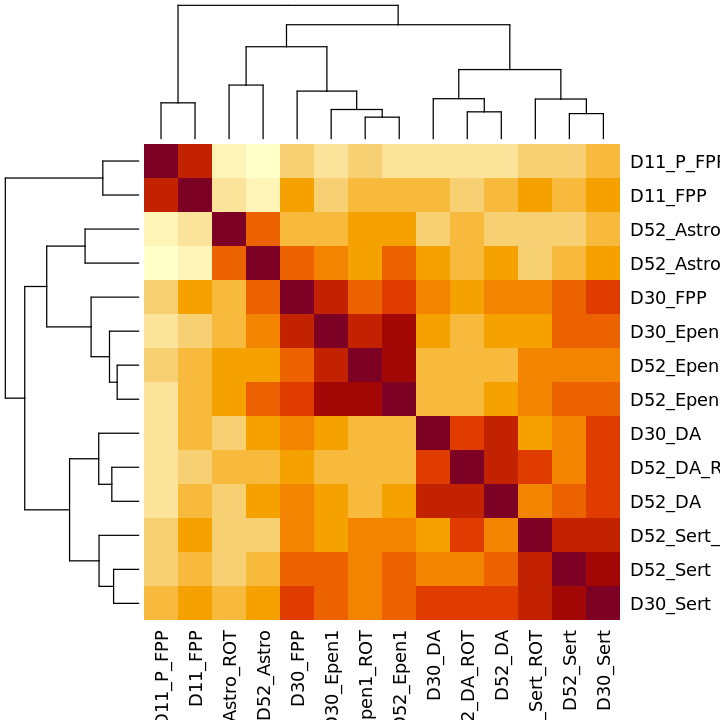

In [105]:
options(repr.plot.width=6, repr.plot.height=6)
heatmap(mat_to_plot, symm = T)


Attaching package: ‘reshape’

The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast



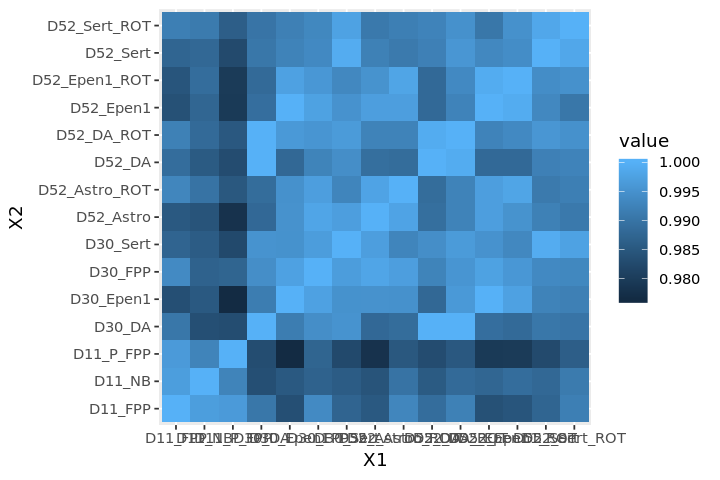

In [76]:
library(reshape)
melted_mat_to_plot = melt(mat_to_plot)
# head(melted_mat_to_plot,2)
options(repr.plot.width=6, repr.plot.height=4)
ggplot(as.data.frame(melted_mat_to_plot), aes(X1, X2, fill= value)) + 
  geom_tile()